In [73]:
import warnings
warnings.filterwarnings(action='ignore')

from tqdm import tqdm

import pandas as pd
import itertools
import folium
from pyproj import Transformer, transform
import time
import numpy as np
import matplotlib.pyplot as plt
from math import radians, cos, sin, asin, sqrt

from collections import deque
import powerlaw

In [74]:
def isBoundary(x):
      return x<n1*n2 and x>=0
def sea(n1,n2,a,df):
    n1 = int(n1)
    n2= int(n2)
    if df2['idx'].iloc[a][1]==0:
        return list(filter(isBoundary, [a+1,a+n1,a+n1+1,a-n1,a-n1+1]))
    if df2['idx'].iloc[a][1]==n1-1:
        return list(filter(isBoundary, [a-1,a+n1,a+n1-1,a-n1,a-n1-1]))

    return list(filter(isBoundary, [a+1,a-1,a+n1,a+n1-1,a+n1+1,a-n1,a-n1-1,a-n1+1]))


In [75]:
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance in kilometers between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371.0088 # Radius of earth in kilometers. Use 3956 for miles. Determines return value units.
    return c * r

In [76]:
forders= os.listdir('./LA/')
forders

['LA_JUMP_Biketrip_2020-01(4hour_0).csv',
 'LA_JUMP_Biketrip_2020-02(4hour_0).csv',
 'LA_JUMP_Biketrip_2019-12(4hour_0).csv']

In [77]:
station_raw = pd.DataFrame()
for files in forders:
    print(files)
    df= pd.read_csv('./LA/'+files,encoding='utf-8')
    station_raw = pd.concat([station_raw, df])

LA_JUMP_Biketrip_2020-01(4hour_0).csv
LA_JUMP_Biketrip_2020-02(4hour_0).csv
LA_JUMP_Biketrip_2019-12(4hour_0).csv


station_raw = pd.read_csv('./LA/LA_JUMP_Biketrip_2019-12(4hour_0).csv')
k=[]
'''
for i in range(0,301740):
    k.append(time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(station_raw.iloc[i]['time_stamp_ori']))) 
station_raw['time_stamp_ori']=k
'''
station_raw

In [78]:
station_raw=station_raw[station_raw.start_lat>33]
station_raw=station_raw[station_raw.end_lat>33]
station_raw=station_raw[station_raw.end_lat<34.5]
station_raw=station_raw[station_raw.start_lat<34.5]
station_raw=station_raw[station_raw.end_lon>-119]
station_raw=station_raw[station_raw.end_lon>-119]

station_raw=station_raw[station_raw.end_lon<-115]
station_raw=station_raw[station_raw.start_lon<-115]
station_raw = station_raw[station_raw.start_lon!=station_raw.end_lon]
station_raw = station_raw[station_raw.start_lon!=station_raw.end_lon]
station_raw = station_raw[station_raw.start_lat!=station_raw.end_lat]



station_raw

,Unnamed: 0,bike_id,start_time,start_lat,start_lon,start_soc,end_time,end_lat,end_lon,end_soc,duration_second,start_e_level,end_e_level,battery_cosmp
0,0,00475013-f139-40d1-8be7-e4f41e008ed4,2020-01-01 00:01:08,34.007213,-118.492552,72%,2020-01-01 00:02:08,34.007197,-118.492550,72%,60.0,72,72,0
1,1,00475013-f139-40d1-8be7-e4f41e008ed4,2020-01-01 00:11:08,34.007197,-118.492550,72%,2020-01-01 00:12:09,34.007207,-118.492552,72%,61.0,72,72,0
2,2,00475013-f139-40d1-8be7-e4f41e008ed4,2020-01-01 00:21:08,34.007207,-118.492552,72%,2020-01-01 00:22:07,34.007215,-118.492555,72%,59.0,72,72,0
5,5,00475013-f139-40d1-8be7-e4f41e008ed4,2020-01-01 00:51:07,34.007182,-118.492555,72%,2020-01-01 00:52:07,34.007102,-118.492517,72%,60.0,72,72,0
6,6,00475013-f139-40d1-8be7-e4f41e008ed4,2020-01-01 01:01:07,34.007102,-118.492517,72%,2020-01-01 01:02:07,34.007062,-118.492447,72%,60.0,72,72,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4792688,4822122,80732c2b-8166-4996-9677-99bc63a8a1fe,2019-12-30 08:11:07,34.019690,-118.497472,29%,2019-12-30 08:12:07,34.019697,-118.497480,29%,60.0,29,29,0
4792689,4822123,80732c2b-8166-4996-9677-99bc63a8a1fe,2019-12-30 08:21:08,34.019697,-118.497480,29%,2019-12-30 08:22:07,34.019573,-118.497420,29%,59.0,29,29,0
4792690,4822124,80732c2b-8166-4996-9677-99bc63a8a1fe,2019-12-30 08:31:08,34.019573,-118.497420,29%,2019-12-30 08:32:08,34.019458,-118.497422,29%,60.0,29,29,0
4792692,4822126,80732c2b-8166-4996-9677-99bc63a8a1fe,2019-12-30 08:49:07,34.019537,-118.497422,29%,2019-12-30 08:50:07,34.019507,-118.497485,29%,60.0,29,29,0


In [79]:
station_raw['start_time'].min(),station_raw['end_time'].max()


('2019-12-01 00:00:05', '2020-02-20 17:08:00')

In [80]:
df111

,Unnamed: 0,bike_id,start_time,start_lat,start_lon,start_soc,end_time,end_lat,end_lon,end_soc,duration_second,start_e_level,end_e_level,battery_cosmp
387,393,009c1a08-bc62-45d8-96b9-cead518582d5,2019-12-11 00:07:06,34.052695,-118.431595,51%,2019-12-11 00:08:08,34.052613,-118.431502,51%,62.0,51,51,0
388,394,009c1a08-bc62-45d8-96b9-cead518582d5,2019-12-11 00:17:07,34.052613,-118.431502,51%,2019-12-11 00:18:07,34.052577,-118.431463,51%,60.0,51,51,0
389,395,009c1a08-bc62-45d8-96b9-cead518582d5,2019-12-11 00:27:07,34.052577,-118.431463,51%,2019-12-11 00:28:07,34.052605,-118.431423,51%,60.0,51,51,0
390,396,009c1a08-bc62-45d8-96b9-cead518582d5,2019-12-11 00:37:07,34.052605,-118.431423,51%,2019-12-11 00:38:07,34.052635,-118.431475,51%,60.0,51,51,0
391,397,009c1a08-bc62-45d8-96b9-cead518582d5,2019-12-11 00:47:08,34.052635,-118.431475,51%,2019-12-11 00:48:07,34.052573,-118.431525,51%,59.0,51,51,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4755209,4784421,256f8a1c-ea20-4334-ac10-45552beb56dd,2019-12-11 23:22:07,34.015420,-118.469913,90%,2019-12-11 23:23:06,34.015403,-118.469908,90%,59.0,90,90,0
4755210,4784422,256f8a1c-ea20-4334-ac10-45552beb56dd,2019-12-11 23:32:07,34.015403,-118.469908,90%,2019-12-11 23:33:06,34.015362,-118.469905,90%,59.0,90,90,0
4755211,4784423,256f8a1c-ea20-4334-ac10-45552beb56dd,2019-12-11 23:42:07,34.015362,-118.469905,90%,2019-12-11 23:43:06,34.015352,-118.469885,90%,59.0,90,90,0
4755212,4784424,256f8a1c-ea20-4334-ac10-45552beb56dd,2019-12-11 23:52:06,34.015352,-118.469885,90%,2019-12-11 23:53:06,34.015328,-118.469902,90%,60.0,90,90,0


In [91]:
query_day=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]
query_day2=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
df1= station_raw

df1['start_time'] = pd.to_datetime(df1['start_time'])
for day in query_day:
    globals()['dfd{}'.format(day)]=  df1.query('start_time.dt.day == @day and start_time.dt.month==12')
    globals()['df1{}1'.format(day)] = globals()['dfd{}'.format(day)].query('start_time.dt.hour <= 7 and start_time.dt.hour>=0')
    globals()['df1{}2'.format(day)] = globals()['dfd{}'.format(day)].query('start_time.dt.hour <= 15 and start_time.dt.hour>=8')
    globals()['df1{}3'.format(day)] = globals()['dfd{}'.format(day)].query('start_time.dt.hour <= 23 and start_time.dt.hour>=16')
    globals()['df1{}1'.format(day)].reset_index(drop=True, inplace=True)
    globals()['df1{}2'.format(day)].reset_index(drop=True, inplace=True)
    globals()['df1{}3'.format(day)].reset_index(drop=True, inplace=True)
    globals()['dfj{}'.format(day)]=  df1.query('start_time.dt.day == @day and start_time.dt.month==1')
    globals()['df2{}1'.format(day)] = globals()['dfj{}'.format(day)].query('start_time.dt.hour <= 7 and start_time.dt.hour>=0')
    globals()['df2{}2'.format(day)] = globals()['dfj{}'.format(day)].query('start_time.dt.hour <= 15 and start_time.dt.hour>=8')
    globals()['df2{}3'.format(day)] = globals()['dfj{}'.format(day)].query('start_time.dt.hour <= 23 and start_time.dt.hour>=16')
    globals()['df2{}1'.format(day)].reset_index(drop=True, inplace=True)
    globals()['df2{}2'.format(day)].reset_index(drop=True, inplace=True)
    globals()['df2{}3'.format(day)].reset_index(drop=True, inplace=True)
#    globals()['df1{}1'.format(day)]=globals()['df1{}1'.format(day)].drop(['Unnamed: 0','bike_id','start_time','start_soc','end_time','end_lat','end_lon','end_soc','duration_second','start_e_level','end_e_level','battery_cosmp'],axis=1)   
#    globals()['df1{}2'.format(day)]=globals()['df1{}2'.format(day)].drop(['Unnamed: 0','bike_id','start_time','start_soc','end_time','end_lat','end_lon','end_soc','duration_second','start_e_level','end_e_level','battery_cosmp'],axis=1)   
#    globals()['df1{}3'.format(day)]=globals()['df1{}3'.format(day)].drop(['Unnamed: 0','bike_id','start_time','start_soc','end_time','end_lat','end_lon','end_soc','duration_second','start_e_level','end_e_level','battery_cosmp'],axis=1)   
#    globals()['df2{}1'.format(day)]=globals()['df2{}1'.format(day)].drop(['Unnamed: 0','bike_id','start_time','start_soc','end_time','end_lat','end_lon','end_soc','duration_second','start_e_level','end_e_level','battery_cosmp'],axis=1)   
#    globals()['df2{}2'.format(day)]=globals()['df2{}2'.format(day)].drop(['Unnamed: 0','bike_id','start_time','start_soc','end_time','end_lat','end_lon','end_soc','duration_second','start_e_level','end_e_level','battery_cosmp'],axis=1)   
#    globals()['df2{}3'.format(day)]=globals()['df2{}3'.format(day)].drop(['Unnamed: 0','bike_id','start_time','start_soc','end_time','end_lat','end_lon','end_soc','duration_second','start_e_level','end_e_level','battery_cosmp'],axis=1)   

    
for day in query_day2:
    globals()['dff{}'.format(day)]=  df1.query('start_time.dt.day == @day and start_time.dt.month==2')
    globals()['df3{}1'.format(day)] = globals()['dff{}'.format(day)].query('start_time.dt.hour <= 7 and start_time.dt.hour>=0')
    globals()['df3{}2'.format(day)] = globals()['dff{}'.format(day)].query('start_time.dt.hour <= 15 and start_time.dt.hour>=8')
    globals()['df3{}3'.format(day)] = globals()['dff{}'.format(day)].query('start_time.dt.hour <= 23 and start_time.dt.hour>=16')
    globals()['df3{}1'.format(day)].reset_index(drop=True, inplace=True)
    globals()['df3{}2'.format(day)].reset_index(drop=True, inplace=True)
    globals()['df3{}3'.format(day)].reset_index(drop=True, inplace=True)
#    globals()['df3{}1'.format(day)]=globals()['df3{}1'.format(day)].drop(['Unnamed: 0','bike_id','start_time','start_soc','end_time','end_lat','end_lon','end_soc','duration_second','start_e_level','end_e_level','battery_cosmp'],axis=1)   
#    globals()['df3{}2'.format(day)]=globals()['df3{}2'.format(day)].drop(['Unnamed: 0','bike_id','start_time','start_soc','end_time','end_lat','end_lon','end_soc','duration_second','start_e_level','end_e_level','battery_cosmp'],axis=1)    
#    globals()['df3{}3'.format(day)]=globals()['df3{}3'.format(day)].drop(['Unnamed: 0','bike_id','start_time','start_soc','end_time','end_lat','end_lon','end_soc','duration_second','start_e_level','end_e_level','battery_cosmp'],axis=1)  



In [92]:
df1111

,Unnamed: 0,bike_id,start_time,start_lat,start_lon,start_soc,end_time,end_lat,end_lon,end_soc,duration_second,start_e_level,end_e_level,battery_cosmp
0,393,009c1a08-bc62-45d8-96b9-cead518582d5,2019-12-11 00:07:06,34.052695,-118.431595,51%,2019-12-11 00:08:08,34.052613,-118.431502,51%,62.0,51,51,0
1,394,009c1a08-bc62-45d8-96b9-cead518582d5,2019-12-11 00:17:07,34.052613,-118.431502,51%,2019-12-11 00:18:07,34.052577,-118.431463,51%,60.0,51,51,0
2,395,009c1a08-bc62-45d8-96b9-cead518582d5,2019-12-11 00:27:07,34.052577,-118.431463,51%,2019-12-11 00:28:07,34.052605,-118.431423,51%,60.0,51,51,0
3,396,009c1a08-bc62-45d8-96b9-cead518582d5,2019-12-11 00:37:07,34.052605,-118.431423,51%,2019-12-11 00:38:07,34.052635,-118.431475,51%,60.0,51,51,0
4,397,009c1a08-bc62-45d8-96b9-cead518582d5,2019-12-11 00:47:08,34.052635,-118.431475,51%,2019-12-11 00:48:07,34.052573,-118.431525,51%,59.0,51,51,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49947,4762953,fc2fc348-3198-4373-b465-9cfae1e6f08c,2019-12-11 07:19:07,34.032272,-118.495448,89%,2019-12-11 07:20:08,34.032270,-118.495403,89%,61.0,89,89,0
49948,4762954,fc2fc348-3198-4373-b465-9cfae1e6f08c,2019-12-11 07:29:07,34.032270,-118.495403,89%,2019-12-11 07:30:10,34.032250,-118.495488,89%,63.0,89,89,0
49949,4762955,fc2fc348-3198-4373-b465-9cfae1e6f08c,2019-12-11 07:38:07,34.032250,-118.495488,89%,2019-12-11 07:40:07,34.032265,-118.495458,89%,120.0,89,89,0
49950,4762956,fc2fc348-3198-4373-b465-9cfae1e6f08c,2019-12-11 07:49:06,34.032265,-118.495458,89%,2019-12-11 07:50:07,34.032270,-118.495455,89%,61.0,89,89,0


In [82]:
df2list = []
minln,maxln = min(df1.end_lat.min(),df1.start_lat.min()) , max(df1.end_lat.max(),df1.start_lat.max())
minlo,maxlo = min(df1.start_lon.min(),df1.end_lon.min()), max(df1.start_lon.max(),df1.end_lon.max())


In [83]:
maxln,maxlo,minln,minlo

(34.3838, -117.54416333333332, 33.768026666666664, -118.92138166666666)

In [84]:
me=400
transformer = Transformer.from_crs("epsg:4326", "epsg:6423")
transformer_5186_4326 = Transformer.from_crs("epsg:6423", "epsg:4326")

minlat,minlon=transformer.transform(minln,minlo)
maxlat,maxlon=transformer.transform(maxln,maxlo)
minlat-maxlat,minlon-maxlon

p_4326 = (minln, minlo) # 구글 지도 보고 적당히 고른 서남단 좌표.
p_y_5186, p_x_5186 = transformer.transform(p_4326[0], p_4326[1])
meters = me # 1km
n1 = int(abs(minlat-maxlat))//me
n2 = int(abs(minlon-maxlon))//me+1
m = folium.Map(location=(p_4326[0], p_4326[1]), zoom_start=11) # folium.Map 은 (lat, lng) 로 location 을 받음에 유의!
df = pd.DataFrame(columns=['idx', 'll','rl','ru','lu'])

idx=0
for x, y in tqdm(itertools.product(range(int(n1)), range(int(n2)))):
    grid_lower_l = transformer_5186_4326.transform(p_y_5186 + (x + 0) * meters, p_x_5186 + (y + 0) * meters)
    grid_lower_r = transformer_5186_4326.transform(p_y_5186 + (x + 1) * meters, p_x_5186 + (y + 0) * meters)
    grid_upper_r = transformer_5186_4326.transform(p_y_5186 + (x + 1) * meters, p_x_5186 + (y + 1) * meters)
    grid_upper_l = transformer_5186_4326.transform(p_y_5186 + (x + 0) * meters, p_x_5186 + (y + 1) * meters)

    df = df.append(pd.DataFrame([[ [x,y] , grid_lower_l[0] , grid_lower_r[1] , grid_upper_r[1] , grid_upper_r[0]]] , columns=['idx', 'll','rl','ru','lu']), ignore_index=True)
    idx+=1


    folium.PolyLine([grid_lower_l,grid_upper_l], color="black", weight=5, opacity=0.5).add_to(m)
    folium.PolyLine([grid_lower_l,grid_lower_r], color="red", weight=5, opacity=0.5).add_to(m)


54378it [08:57, 101.25it/s]


In [85]:
for i in days:
    print(len(globals()['df{}'.format(i)]))

46371
47754
47431
46591
47498
45496
46097
47479
44438
44004
44676
42351
45393
47623
48045
48645
49110
46296
49826
51215
51655
50753
52198
52228
52349
52854
50534
50591
48506
38407
49952
49183
46006
46396
46743
43487
43803
37687
40543
43667
45310
44843
44255
45219
44444
44758
46390
44875
44125
45900
42725
42635
44758
41948
42398
43859
42230
41307
42422
41239
41236
42960
43696
43336
44920
43534
43161
44302
44735
43253
45550
44969
43223
44270
43462
42268
43196
42352
43169
45164
46263
46405
49888
50921
48919
49859
49196
48001
48789
48222
48100
49288
47138
44234
43478
42156
41264
42350
41641
42667
44600
44093
43673
44104
43823
42635
44187
44635
42000
46720
45828
44902
46039
44909
43542
46417
46409
46686
47312
46301
46162
49069
48882
47727
48761
49016
47849
49925
48478
47779
48973
47920
46605
19243
0
0
0
0
0
0
0
0
19691
26047
23973
23601
22684
21401
11839
19979
19105
19419
19210
18509
19355
19022
18006
18483
18733
18898
19666
19826
19961
20789
20199
19914
20824
13125
18837
20203
19301
18852


In [86]:
days1=[]
for i in range(1,32):
    for j in [1,2,3]:
        days1.append(int(str(1)+str(i)+str(j)))
days2=[]
for i in range(1,15):
    for j in [1,2,3]:
        days2.append(int(str(2)+str(i)+str(j)))


days=[]   
for i in range(1,20):

    for j in [1,2,3]:
        days.append(int(str(3)+str(i)+str(j)))

days=days1+days2+days
days

[111,
 112,
 113,
 121,
 122,
 123,
 131,
 132,
 133,
 141,
 142,
 143,
 151,
 152,
 153,
 161,
 162,
 163,
 171,
 172,
 173,
 181,
 182,
 183,
 191,
 192,
 193,
 1101,
 1102,
 1103,
 1111,
 1112,
 1113,
 1121,
 1122,
 1123,
 1131,
 1132,
 1133,
 1141,
 1142,
 1143,
 1151,
 1152,
 1153,
 1161,
 1162,
 1163,
 1171,
 1172,
 1173,
 1181,
 1182,
 1183,
 1191,
 1192,
 1193,
 1201,
 1202,
 1203,
 1211,
 1212,
 1213,
 1221,
 1222,
 1223,
 1231,
 1232,
 1233,
 1241,
 1242,
 1243,
 1251,
 1252,
 1253,
 1261,
 1262,
 1263,
 1271,
 1272,
 1273,
 1281,
 1282,
 1283,
 1291,
 1292,
 1293,
 1301,
 1302,
 1303,
 1311,
 1312,
 1313,
 211,
 212,
 213,
 221,
 222,
 223,
 231,
 232,
 233,
 241,
 242,
 243,
 251,
 252,
 253,
 261,
 262,
 263,
 271,
 272,
 273,
 281,
 282,
 283,
 291,
 292,
 293,
 2101,
 2102,
 2103,
 2111,
 2112,
 2113,
 2121,
 2122,
 2123,
 2131,
 2132,
 2133,
 2141,
 2142,
 2143,
 311,
 312,
 313,
 321,
 322,
 323,
 331,
 332,
 333,
 341,
 342,
 343,
 351,
 352,
 353,
 361,
 362,
 363,
 

In [93]:
ex=[]
for index in days:
    for me in [400]:
        if len(globals()['df{}'.format(index)])==0:
            globals()['list_in{}'.format(index)]= []
            globals()['list_out{}'.format(index)]= []
            ex.append(index)
            continue
        meters=me
        globals()['list_in{}'.format(index)]= []
        for i in range(0,len(globals()['df{}'.format(index)])-1):
            temp=transformer.transform(globals()['df{}'.format(index)]['start_lat'].iloc[i], globals()['df{}'.format(index)]['start_lon'].iloc[i])
            globals()['list_in{}'.format(index)].append(n2*abs(minlon-temp[1])//me+abs(maxlat-temp[0])//me)
        globals()['list_out{}'.format(index)]= []
        for i in range(0,len(globals()['df{}'.format(index)])-1):
            temp=transformer.transform(globals()['df{}'.format(index)]['end_lat'].iloc[i], globals()['df{}'.format(index)]['end_lon'].iloc[i])
            globals()['list_out{}'.format(index)].append(n2*abs(minlon-temp[1])//me+abs(maxlat-temp[0])//me)              
        globals()['cnt_in{}'.format(index)] = np.empty(int((n1)*(n2)))
        globals()['cnt_out{}'.format(index)] = np.empty(int((n1)*(n2)))
        globals()['cnt_in{}'.format(index)].fill(0)
        globals()['cnt_out{}'.format(index)].fill(0)
        for i in range(0,min(len(globals()['list_out{}'.format(index)]),len(globals()['list_in{}'.format(index)]))):
            k = [globals()['list_in{}'.format(index)][i],globals()['list_out{}'.format(index)][i]]
            globals()['cnt_out{}'.format(index)][int(k[1])] += 1
            globals()['cnt_in{}'.format(index)][int(k[0])] += 1
        heat = abs(globals()['cnt_out{}'.format(index)]-globals()['cnt_in{}'.format(index)])
        fit = powerlaw.Fit(heat)
        #fig, axs = plt.subplots(4,1,figsize=(25,25))
        #axs[0].plot(globals()['cnt_in{}'.format(index)])
        #axs[1].plot(globals()['cnt_out{}'.format(index)])
        #axs[2].plot(abs(globals()['cnt_out{}'.format(index)]-globals()['cnt_in{}'.format(index)]))
        #axs[3].plot()
        #fit = powerlaw.Fit(heat)

        #fit.power_law.plot_pdf( color= 'b',linestyle='--',label='fit ccdf')
        #fit.plot_pdf( color= 'b')
        #plt.savefig('./LA_all4'+str(index)+'.png')
        df2 = df['idx']
        df2 = pd.DataFrame(df2)
        m2 = folium.Map(location=(p_4326[0], p_4326[1]), zoom_start=11) # folium.Map 은 (lat, lng) 로 location 을 받음에 유의!
        df['heat'] = heat
        resolution = (256/int(np.max(heat)))
        meters=400
        for i in range(0,int(n1*n2)):
            if df['heat'][i] == 0:
                continue

            grid_lower_l = transformer_5186_4326.transform(minlat + (i//n2) * meters, maxlon - (i%n2) * meters)
            grid_lower_r = transformer_5186_4326.transform(minlat + (i//n2) * meters, maxlon - (i%n2) * meters)
            grid_upper_r = transformer_5186_4326.transform(minlat + (i//n2) * meters, maxlon - (i%n2) * meters)
            grid_upper_l = transformer_5186_4326.transform(minlat + (i//n2) * meters, maxlon - (i%n2) * meters)

            folium.PolyLine([grid_upper_l,grid_upper_r], color="black", weight=1, opacity=0.5).add_to(m2)
            folium.PolyLine([grid_lower_r,grid_upper_r], color="black", weight=1, opacity=0.5).add_to(m2)
            folium.PolyLine([grid_lower_l,grid_upper_l], color="black", weight=1, opacity=0.5).add_to(m2)
            folium.PolyLine([grid_lower_l,grid_lower_r], color="black", weight=1, opacity=0.5).add_to(m2)
        # colors2 = 'ff' + format(int(256-resolution*df['heat'][n1*x+y]),'x') + format(int(256-resolution*df['heat'][n1*x+y]),'x')
            if df['heat'][i]<=1:
                continue


            folium.CircleMarker(
                location=[(grid_lower_l[0]+grid_upper_r[0])/2,(grid_lower_l[1]+grid_upper_r[1])/2],
                weight=15,
                color = '#ff0000', radius=5
        #        fill=True,
        #        fill_color='#'+colors2,
        ).add_to(m2)
        m2.save("./LA_Grid4"+str(index)+"Heat"+".html")


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit



        fit.power_law.plot_pdf( color= 'b',linestyle='--',label='fit ccdf')
        fit.plot_pdf( color= 'b')
        plt.savefig('./Untitled Folder/LA_all4'+str(meters)+'.png')
        df2 = df['idx']
        df2 = pd.DataFrame(df2)
        df2['heat'] = df['heat']
        visited=[]
        need_visited=deque()
        returnlist=[]
        for i in range(0,int(n1)*int(n2)):
            temp=[]
            if i in visited:
                continue
            if df2['heat'].iloc[i]<=5:
                visited.append(i)
                continue
            need_visited.append(i)
            #print("hey",i)
            while need_visited:
                idx=need_visited[-1]
                if need_visited[-1] in visited:
                    need_visited.pop()
                    continue
                visited.append(idx)

                if df2['heat'].iloc[need_visited[-1]]>5 and idx not in temp:
                    temp.append(idx)
                    need_visited.pop()
                    #print("hi",idx)
                    for candidate in sea(n1,n2,idx,df2):
                        if df2['heat'].iloc[candidate]>5 :
                            #print(candidate,need_visited)
                            visited.append(candidate)

                            if candidate not in temp:
                                #print('i',candidate,temp)
                                temp.append(candidate)
                                need_visited.extend(sea(n1,n2,candidate,df2))
                else:
                    need_visited.pop()
            returnlist.append(temp)
        globals()['df3{}'.format(index)] = pd.DataFrame()
        globals()['df3{}'.format(index)]['return']=returnlist


In [ ]:
m2

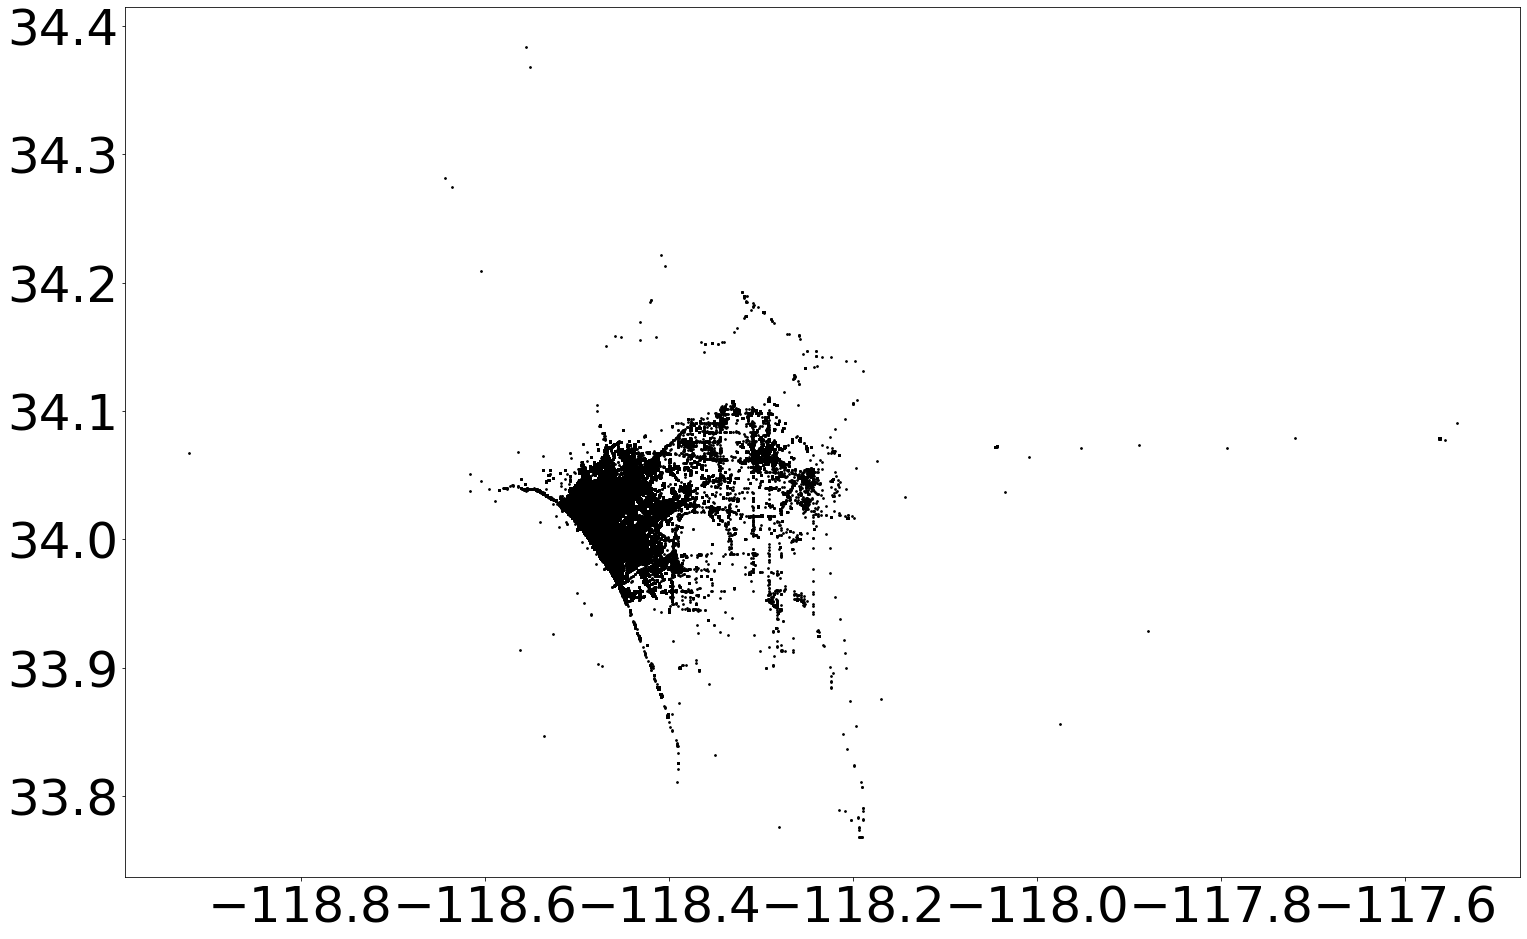

In [94]:
fig, ax = plt.subplots(figsize=[25, 16])

df_scatter = ax.scatter(df1['start_lon'], df1['start_lat'], c='k', alpha=1, s=3)


In [95]:
import networkx as nx

In [96]:
def node_strength(G, node, attribute):
    """
    Node strength is defined as the sum of the strengths (or weights) of all
    of the nodes edges.

    Parameters
    ----------
    G: graph
       A networkx graph
    node: object
       A node in the networkx graph
    attribute: object
       The edge attribute used to quantify node strength

    Returns
    -------
    node strength: (int, float)
    """
    output = 0.0
    for edge in G.edges(node):
        output += G.get_edge_data(*edge)[attribute]
    return output



In [97]:
strength=[]


In [98]:
pos={}
for k in range(0,int(n1*n2)):
    pos.update({k:[df['idx'][k][1],n1-df['idx'][k][0]]})


In [99]:
for i in days:
    if len(globals()['list_in{}'.format(i)])==0:
        strength.append(0)
        continue
    G=nx.Graph()
    df_network = pd.DataFrame()
    df_network['in']=globals()['list_in{}'.format(i)]
    df_network['out']=globals()['list_out{}'.format(i)]

    df_network['weight'] = df_network.groupby(['in', 'out'])['in'].transform('size')
    G = nx.from_pandas_edgelist(df_network, 'in', 'out',
                            create_using=nx.DiGraph(),edge_attr='weight')
    G.remove_edges_from(nx.selfloop_edges(G))
    heat_r = abs(globals()['cnt_in{}'.format(i)]-globals()['cnt_out{}'.format(i)])
    heat=[]
    for j in range(len(list(G.nodes))):
        heat.append(100*heat_r[int(list(G.nodes)[j])])
    strength.append(node_strength(G,G.nodes,'weight'))
    #plt.figure(figsize=(90,60))
    #nx.draw(G,pos,node_size=heat)
    #plt.savefig('hi{}.jpg'.format(i))
    #plt.show()

In [100]:
strength

[27263.0,
 30466.0,
 29125.0,
 27561.0,
 31404.0,
 28497.0,
 27225.0,
 31011.0,
 28014.0,
 25563.0,
 28269.0,
 26135.0,
 26823.0,
 32051.0,
 31226.0,
 29292.0,
 32727.0,
 30244.0,
 29832.0,
 33864.0,
 33360.0,
 30530.0,
 34207.0,
 33394.0,
 31745.0,
 36460.0,
 32735.0,
 30501.0,
 33293.0,
 25732.0,
 30619.0,
 33487.0,
 30370.0,
 28921.0,
 32250.0,
 28660.0,
 26944.0,
 26547.0,
 27276.0,
 26468.0,
 30258.0,
 29459.0,
 27324.0,
 30892.0,
 29052.0,
 27659.0,
 32802.0,
 30298.0,
 27098.0,
 32049.0,
 28281.0,
 26113.0,
 31325.0,
 27912.0,
 25767.0,
 30740.0,
 28607.0,
 25222.0,
 30135.0,
 27462.0,
 25032.0,
 29422.0,
 29062.0,
 26238.0,
 30031.0,
 28563.0,
 26501.0,
 30518.0,
 30120.0,
 27276.0,
 32196.0,
 29924.0,
 27084.0,
 29793.0,
 28726.0,
 26761.0,
 30074.0,
 28590.0,
 27927.0,
 32342.0,
 32664.0,
 30892.0,
 36494.0,
 36537.0,
 32302.0,
 36212.0,
 35079.0,
 32309.0,
 35955.0,
 34540.0,
 32380.0,
 36522.0,
 33870.0,
 29948.0,
 31510.0,
 30003.0,
 27937.0,
 31329.0,
 29964.0,
 29076.0,


In [101]:
node_strength(G,G.nodes,'weight')

11081.0

In [102]:
days

[111,
 112,
 113,
 121,
 122,
 123,
 131,
 132,
 133,
 141,
 142,
 143,
 151,
 152,
 153,
 161,
 162,
 163,
 171,
 172,
 173,
 181,
 182,
 183,
 191,
 192,
 193,
 1101,
 1102,
 1103,
 1111,
 1112,
 1113,
 1121,
 1122,
 1123,
 1131,
 1132,
 1133,
 1141,
 1142,
 1143,
 1151,
 1152,
 1153,
 1161,
 1162,
 1163,
 1171,
 1172,
 1173,
 1181,
 1182,
 1183,
 1191,
 1192,
 1193,
 1201,
 1202,
 1203,
 1211,
 1212,
 1213,
 1221,
 1222,
 1223,
 1231,
 1232,
 1233,
 1241,
 1242,
 1243,
 1251,
 1252,
 1253,
 1261,
 1262,
 1263,
 1271,
 1272,
 1273,
 1281,
 1282,
 1283,
 1291,
 1292,
 1293,
 1301,
 1302,
 1303,
 1311,
 1312,
 1313,
 211,
 212,
 213,
 221,
 222,
 223,
 231,
 232,
 233,
 241,
 242,
 243,
 251,
 252,
 253,
 261,
 262,
 263,
 271,
 272,
 273,
 281,
 282,
 283,
 291,
 292,
 293,
 2101,
 2102,
 2103,
 2111,
 2112,
 2113,
 2121,
 2122,
 2123,
 2131,
 2132,
 2133,
 2141,
 2142,
 2143,
 311,
 312,
 313,
 321,
 322,
 323,
 331,
 332,
 333,
 341,
 342,
 343,
 351,
 352,
 353,
 361,
 362,
 363,
 

In [103]:
T=[]
for i in days:
    T.append(len(globals()['list_in{}'.format(i)]))


In [104]:
T1=[]
for i in days:
    if len(globals()['list_in{}'.format(i)])==0:
        T1.append(0)
        continue
    idx=0
    T1.append(2*T[idx]/np.count_nonzero(abs(globals()['cnt_in{}'.format(i)]-globals()['cnt_out{}'.format(i)])))
    idx+=1
T1

[58.91994917407878,
 53.545034642032334,
 56.96560196560196,
 55.6996996996997,
 53.60693641618497,
 54.90822972172884,
 57.24691358024691,
 54.26565242832066,
 55.532934131736525,
 60.103694102397924,
 59.33461292386436,
 54.94075829383886,
 56.548780487804876,
 51.26589275843007,
 52.7831531018782,
 53.575967648757945,
 53.73117033603708,
 53.08528906697195,
 53.73117033603708,
 50.64991807755325,
 52.7831531018782,
 54.32923257176333,
 54.84328799526907,
 51.12458654906285,
 52.27733934611049,
 50.45701849836779,
 48.86195995785037,
 51.839016210173284,
 50.183982683982684,
 52.04264870931537,
 52.15973003374578,
 53.20711417096959,
 53.51413733410271,
 56.0024154589372,
 55.6996996996997,
 57.211597779148676,
 60.22077922077922,
 57.63828464885022,
 57.211597779148676,
 58.807863031071655,
 55.56620730976633,
 56.96560196560196,
 59.639871382636656,
 56.0024154589372,
 55.36716417910448,
 56.2060606060606,
 55.43335325762104,
 54.681603773584904,
 58.40050377833753,
 54.68160377358

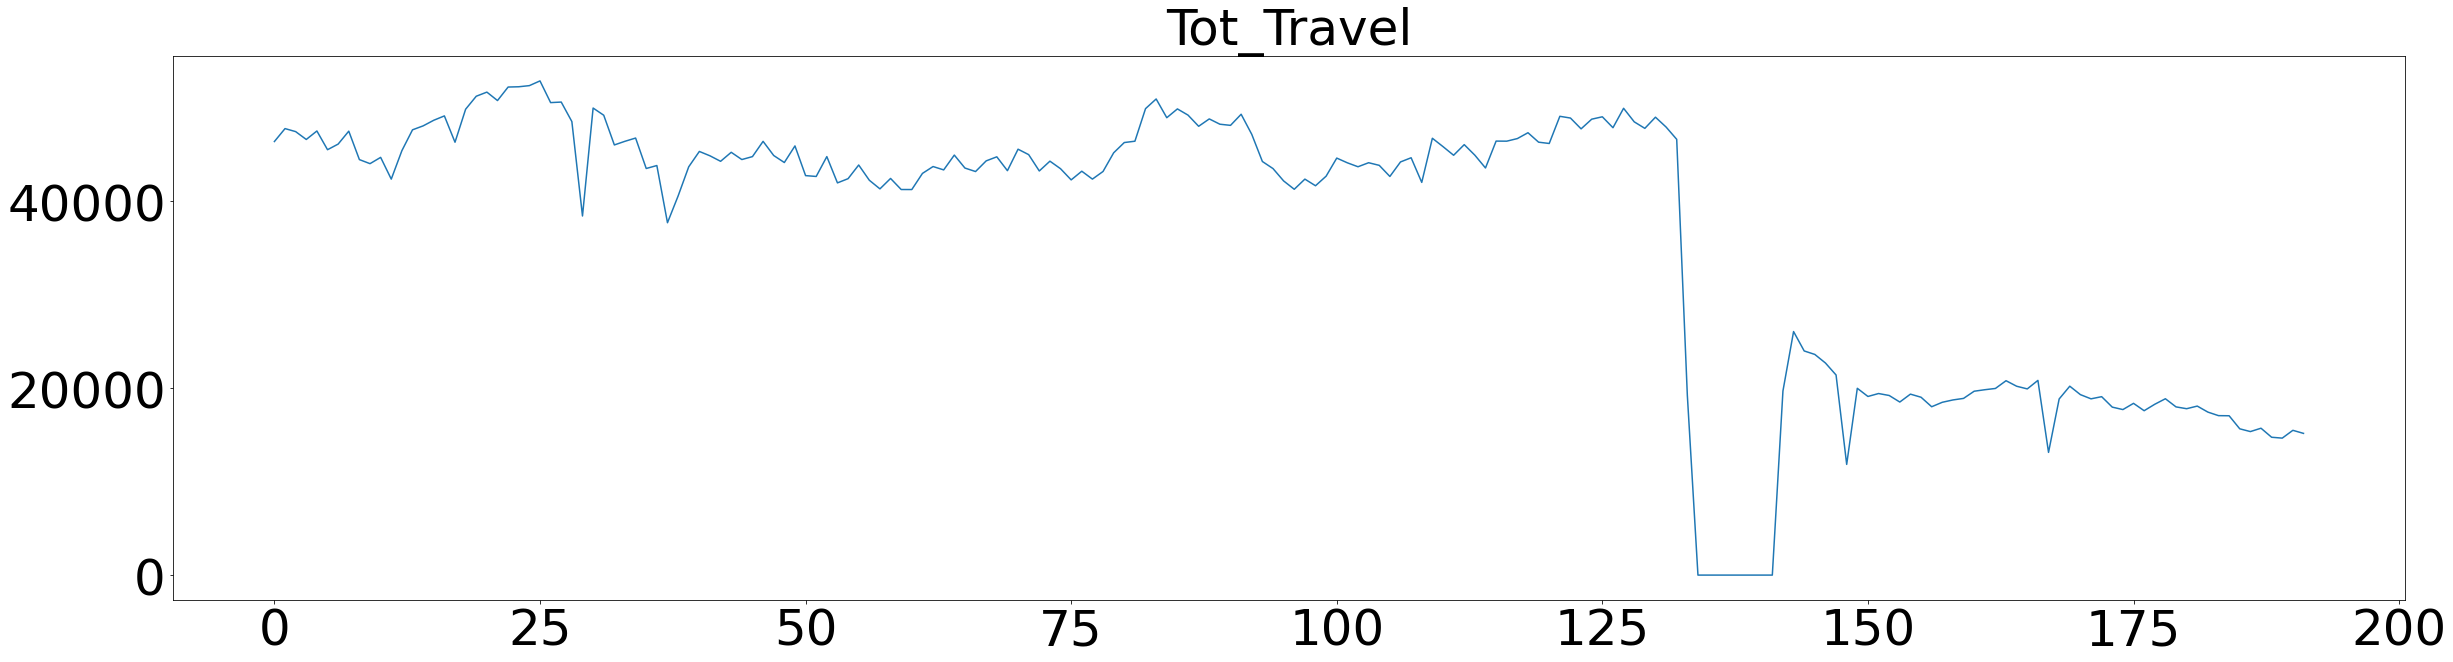

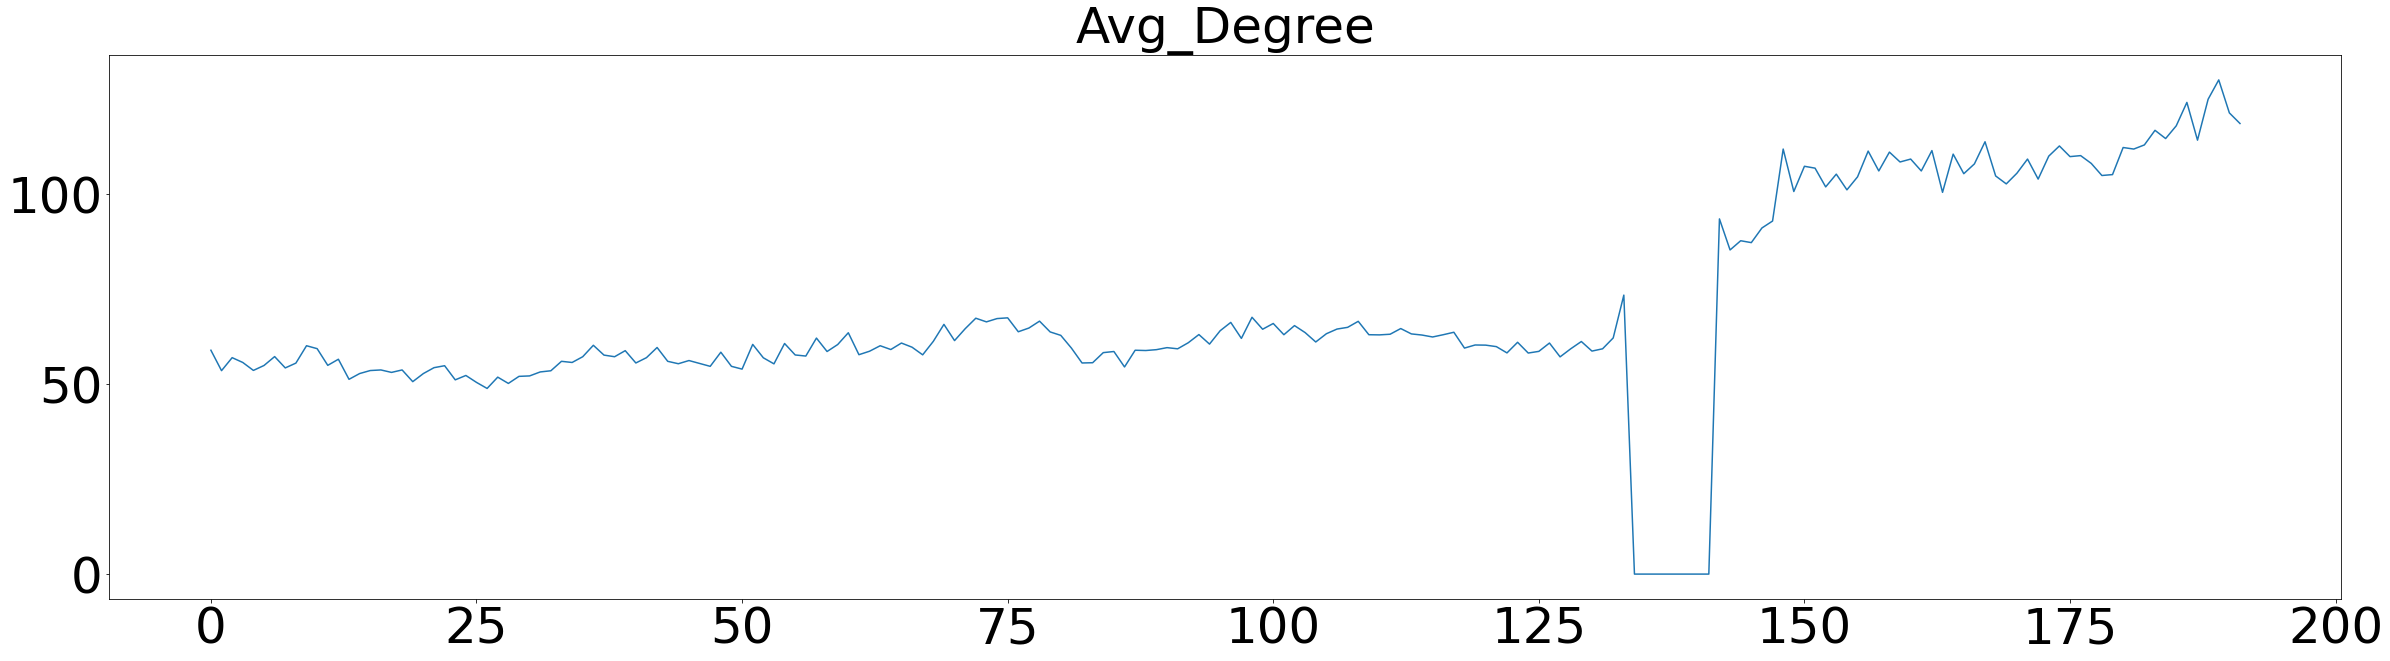

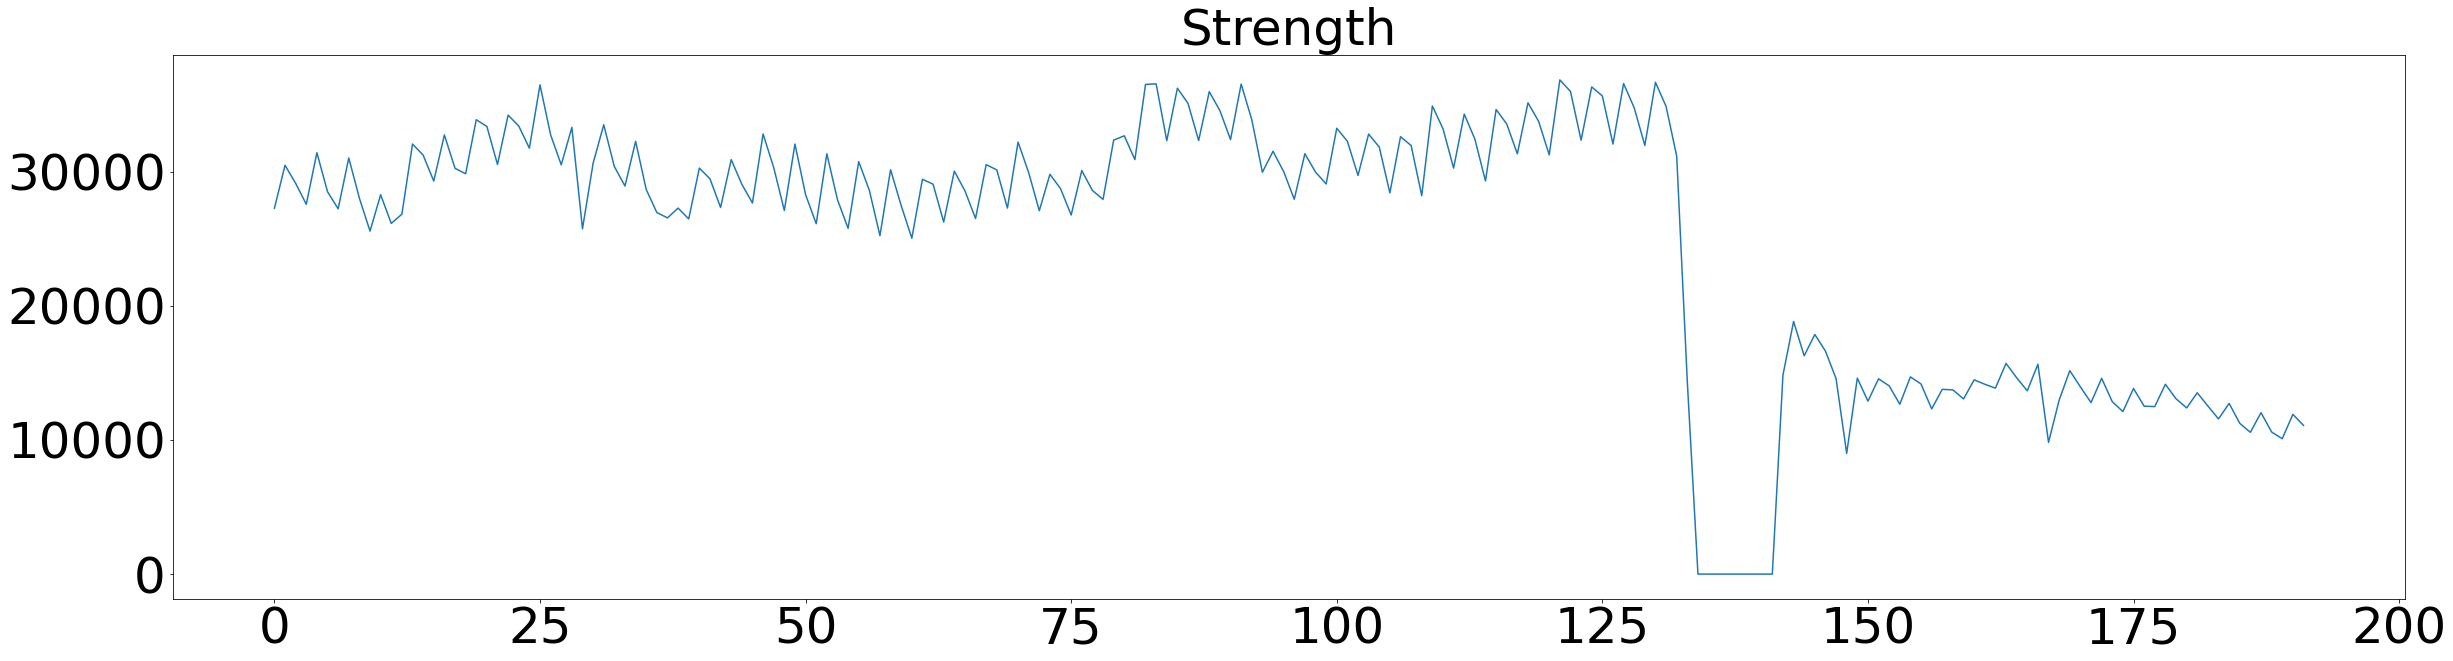

In [105]:
#T(t), <k>
import matplotlib
plt.figure(figsize=(40,10))
matplotlib.rc('xtick', labelsize=50) 
matplotlib.rc('ytick', labelsize=50)

plt.title("Tot_Travel",fontsize=50)

plt.plot(T)
plt.figure(figsize=(40,10))

plt.plot(T1)
plt.title("Avg_Degree",fontsize=50)

plt.figure(figsize=(40,10))
plt.title("Strength",fontsize=50)

plt.plot(strength)

In [ ]:
T1=[]
for i in 1111,1112,1113,1121,1122,1123,1131,1132,1133,1141,1142,1143,1151,1152,1153,1161,1162,1163:
    idx=0
    T1.append(2*T[idx]/np.count_nonzero(abs(globals()['cnt_in{}'.format(i)]-globals()['cnt_out{}'.format(i)])))
    idx+=1
T1

In [ ]:
pos={}
for k in range(0,int(n1*n2)):
    pos.update({k:[k//n1,k%n1]})


In [ ]:
import os
from PIL import Image
from IPython.display import Image as Img
from IPython.display import display

In [ ]:
df2

In [ ]:
cnt_in1111

In [ ]:
df31111